In [1]:
# create a convenience function for dickey fuller test of stationarity #

def dickey_fuller(series,title='Your Dataset'):
    from statsmodels.tsa.stattools import adfuller
    
    print(f'Welcome to the magical Dickey Fuller Test of {title}\n')
    result = adfuller(series.dropna(),autolag='AIC')
    
    df = pd.Series(result[0:4],index=['test-statistics','p-Value','#lags','#obs'])
    
    print (df.to_string())
    
    for key,value in result[4].items():
        print (f'critical {key} value is {value}')
               
                 
    if result[1] < 0.05:
        print ('There is sufficient evidence against the Null Hypothesis')
        print ('We reject the Null Hypothesis')
        print ('Conclusion: The provided dataset is stationary')
    else:
        print ('There is not sufficient evidence against the Null Hypothesis')
        print ('We fail to reject the Null Hypothesis')
        print ('Conclusion: The provided dataset is non-stationary')

In [2]:
# usual imports #
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
# consistent plot size #
from pylab import rcParams
rcParams['figure.figsize']=12,5

In [4]:
# handle unwanted warnings #
import warnings
warnings.filterwarnings(action='ignore')

In [22]:
# import the statsmodels APIs and methods #
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tools.eval_measures import mse,rmse

from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

In [8]:
# load the datasets #
money = pd.read_csv('../Data/M2SLMoneyStock.csv',index_col=0,parse_dates=True)
money.index.freq = 'MS'

spending = pd.read_csv('../Data/PCEPersonalSpending.csv',index_col=0,parse_dates=True)
spending.index.freq = 'MS'

In [9]:
money.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [10]:
spending.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [11]:
df = money.join(spending)

In [13]:
df.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [14]:
df.dropna(inplace=True)

In [15]:
len(df)

252

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 1995-01-01 to 2015-12-01
Freq: MS
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Money     252 non-null    float64
 1   Spending  252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Money,252.0,6978.151190,2554.325115,3489.9,4732.875,6507.40,8699.700,12335.9
Spending,252.0,8562.311905,2231.933352,4850.8,6682.125,8777.15,10262.925,12469.1


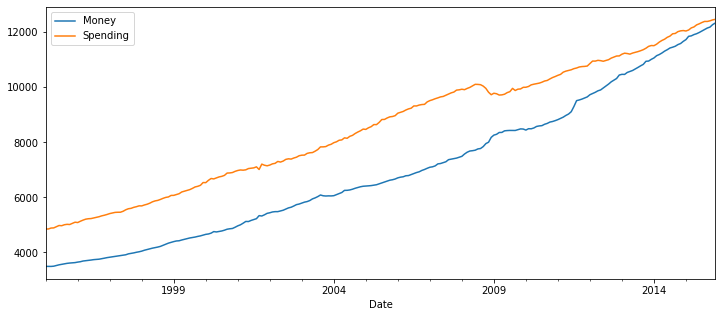

In [21]:
df.plot();

In [23]:
# decompose the data into trend and seasonality #
decompose1 = seasonal_decompose(df['Money'],model='additive')
decompose2 = seasonal_decompose(df['Spending'],model='additive')

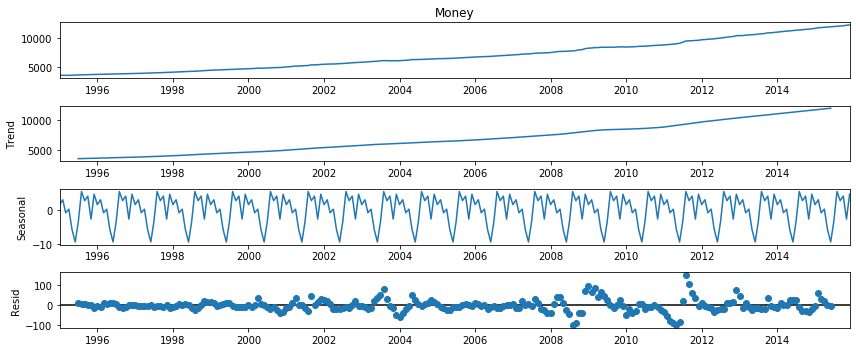

In [24]:
decompose1.plot();

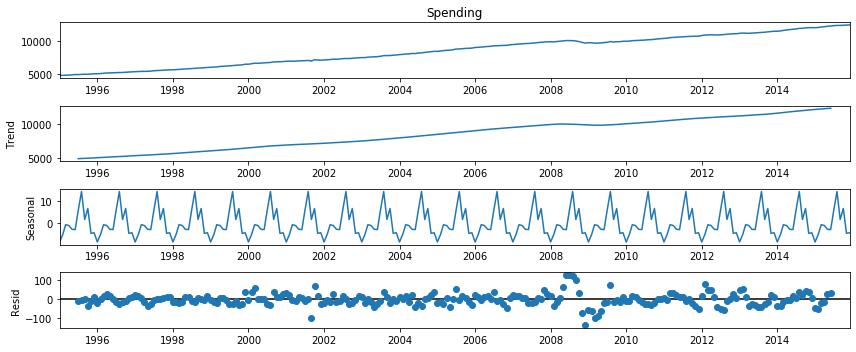

In [26]:
decompose2.plot();

In [28]:
# dickey fuller test on the money and spending column to test for stationarity #
dickey_fuller(df['Money'])
print()
dickey_fuller(df['Spending'])

Welcome to the magical Dickey Fuller Test of Your Dataset

test-statistics      4.239022
p-Value              1.000000
#lags                4.000000
#obs               247.000000
critical 1% value is -3.457105309726321
critical 5% value is -2.873313676101283
critical 10% value is -2.5730443824681606
There is not sufficient evidence against the Null Hypothesis
We fail to reject the Null Hypothesis
Conclusion: The provided dataset is non-stationary

Welcome to the magical Dickey Fuller Test of Your Dataset

test-statistics      0.149796
p-Value              0.969301
#lags                3.000000
#obs               248.000000
critical 1% value is -3.4569962781990573
critical 5% value is -2.8732659015936024
critical 10% value is -2.573018897632674
There is not sufficient evidence against the Null Hypothesis
We fail to reject the Null Hypothesis
Conclusion: The provided dataset is non-stationary


In [29]:
df_transformed = df.diff()

In [30]:
dickey_fuller(df_transformed['Money'])
print()
dickey_fuller(df_transformed['Spending'])

Welcome to the magical Dickey Fuller Test of Your Dataset

test-statistics     -2.057404
p-Value              0.261984
#lags               15.000000
#obs               235.000000
critical 1% value is -3.4584868856997004
critical 5% value is -2.873918902362675
critical 10% value is -2.573367247623359
There is not sufficient evidence against the Null Hypothesis
We fail to reject the Null Hypothesis
Conclusion: The provided dataset is non-stationary

Welcome to the magical Dickey Fuller Test of Your Dataset

test-statistics   -7.226974e+00
p-Value            2.041027e-10
#lags              2.000000e+00
#obs               2.480000e+02
critical 1% value is -3.4569962781990573
critical 5% value is -2.8732659015936024
critical 10% value is -2.573018897632674
There is sufficient evidence against the Null Hypothesis
We reject the Null Hypothesis
Conclusion: The provided dataset is stationary


In [31]:
df_transformed = df_transformed.diff()

In [37]:
dickey_fuller(df_transformed['Money'])
print('***************************************************************')
dickey_fuller(df_transformed['Spending'])

Welcome to the magical Dickey Fuller Test of Your Dataset

test-statistics   -7.077471e+00
p-Value            4.760675e-10
#lags              1.400000e+01
#obs               2.350000e+02
critical 1% value is -3.4584868856997004
critical 5% value is -2.873918902362675
critical 10% value is -2.573367247623359
There is sufficient evidence against the Null Hypothesis
We reject the Null Hypothesis
Conclusion: The provided dataset is stationary
***************************************************************
Welcome to the magical Dickey Fuller Test of Your Dataset

test-statistics   -8.760145e+00
p-Value            2.687900e-14
#lags              8.000000e+00
#obs               2.410000e+02
critical 1% value is -3.4577787098622674
critical 5% value is -2.873608704758507
critical 10% value is -2.573201765981991
There is sufficient evidence against the Null Hypothesis
We reject the Null Hypothesis
Conclusion: The provided dataset is stationary


- Now both the Money and Spending columns are Stationary

In [34]:
# check with auto arima the required order for the data #
auto_arima(df['Money'],maxiter=1000)

ARIMA(maxiter=1000, order=(3, 2, 3))

In [35]:
auto_arima(df['Spending'],maxiter=1000)

ARIMA(maxiter=1000, order=(1, 1, 2))

In [38]:
# using the VARMAX order of (3,3)
df_transformed.head()

,Money,Spending
Date,,
1995-01-01,NaN,NaN
1995-02-01,NaN,NaN
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1


In [39]:
df_transformed.dropna(inplace=True)

In [40]:
df_transformed.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [46]:
# split the data into train and test dataset #
nobs = 12
train = df_transformed.iloc[:-nobs]
test = df_transformed.iloc[-nobs:]

In [47]:
len(test)

12

In [48]:
len(train)

238

In [49]:
# create the VARMAX model and fit the data #
model = VARMAX(train,order=(3,3),trend='c')

In [50]:
fitt = model.fit(maxiter=1000,disp=False)

In [51]:
df_forecast = fitt.forecast(nobs)

In [52]:
df_forecast

,Money,Spending
2015-01-01,-13.094294,34.404588
2015-02-01,-1.528034,-5.647107
2015-03-01,1.754289,-1.822719
2015-04-01,-9.070331,0.771317
2015-05-01,6.315444,4.025694
2015-06-01,-1.714297,-4.028938
2015-07-01,-3.004375,3.033709
2015-08-01,3.848512,0.050493
2015-09-01,-1.896828,-1.387233
2015-10-01,-0.458728,1.758723


### Invert the Transformation

In [67]:

# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money1d'].iloc[-nobs-1] + df_forecast['Money'].cumsum()

KeyError: 'Money1d'

In [54]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending'].cumsum()

In [55]:
df_forecast

,Money,Spending,Money1d,MoneyForecast,Spending1d,SpendingForecast
2015-01-01,-13.094294,34.404588,65.505706,11657.005706,45.004588,12096.404588
2015-02-01,-1.528034,-5.647107,63.977672,11655.477672,39.357481,12090.757481
2015-03-01,1.754289,-1.822719,65.731961,11657.231961,37.534762,12088.934762
2015-04-01,-9.070331,0.771317,56.661630,11648.161630,38.306079,12089.706079
2015-05-01,6.315444,4.025694,62.977074,11654.477074,42.331773,12093.731773
2015-06-01,-1.714297,-4.028938,61.262777,11652.762777,38.302835,12089.702835
2015-07-01,-3.004375,3.033709,58.258402,11649.758402,41.336544,12092.736544
2015-08-01,3.848512,0.050493,62.106913,11653.606913,41.387036,12092.787036
2015-09-01,-1.896828,-1.387233,60.210085,11651.710085,39.999804,12091.399804
2015-10-01,-0.458728,1.758723,59.751357,11651.251357,41.758526,12093.158526


In [57]:
pd.concat([df.iloc[-12:],df_forecast[['MoneyForecast','SpendingForecast']]],axis=1)

,Money,Spending,MoneyForecast,SpendingForecast
Date,,,,
2015-01-01,11733.2,12046.0,11657.005706,12096.404588
2015-02-01,11852.4,12082.4,11655.477672,12090.757481
2015-03-01,11868.8,12158.3,11657.231961,12088.934762
2015-04-01,11916.1,12193.8,11648.161630,12089.706079
2015-05-01,11947.6,12268.1,11654.477074,12093.731773
2015-06-01,11993.1,12308.3,11652.762777,12089.702835
2015-07-01,12045.3,12355.4,11649.758402,12092.736544
2015-08-01,12096.8,12394.0,11653.606913,12092.787036
2015-09-01,12153.8,12392.8,11651.710085,12091.399804


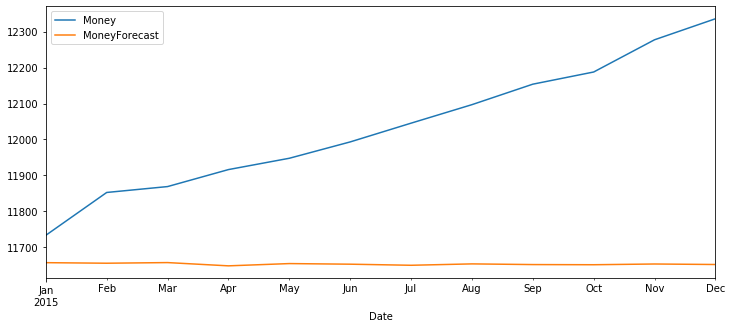

In [61]:
df['Money'][-nobs:].plot(legend=True)
df_forecast['MoneyForecast'].plot(legend=True);

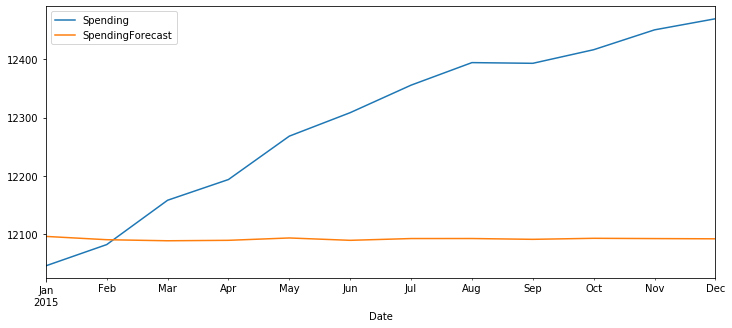

In [64]:
df['Spending'][-nobs:].plot(legend=True)
df_forecast['SpendingForecast'].plot(legend=True);

## Model Evaluation 

In [65]:
RMSE1 = rmse(df['Money'][-nobs:], df_forecast['MoneyForecast'])
print(f'Money VAR(5) RMSE: {RMSE1:.3f}')

Money VAR(5) RMSE: 419.622


In [66]:
RMSE2 = rmse(df['Spending'][-nobs:], df_forecast['SpendingForecast'])
print(f'Spending VAR(5) RMSE: {RMSE2:.3f}')

Spending VAR(5) RMSE: 245.124
